## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset

combine_df=pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")


In [4]:
# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
total_mouse=len((combine_df["Mouse ID"]).unique())
#mouse_number = pd.DataFrame({"Mouse ID":total_mouse]).count()
total_mouse


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Activities=9 (week?)

duplicate_mouse = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_id=combine_df.loc[combine_df["Mouse ID"]=="g989"]

duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combine_df.loc[combine_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
#clean_mouse=drop_dup["Mouse ID"].value_counts()
ntotal_id=len((clean_df["Mouse ID"]).unique())
ntotal_id

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_statistic=clean_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_statistic["Tumor Volume (mm3)"].mean()
#print(tumor_mean)
tumor_median = summary_statistic["Tumor Volume (mm3)"].median()

tumor_variance = summary_statistic["Tumor Volume (mm3)"].var()

tumor_stdev = summary_statistic["Tumor Volume (mm3)"].std()

tumor_sem = summary_statistic["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_df



,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

sum_stats=clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median','var','std', 'sem']})

sum_stats




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

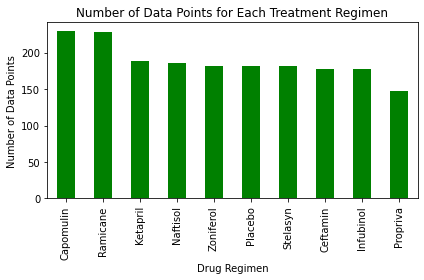

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_clean=clean_df["Drug Regimen"].value_counts()

bar_plt=bar_clean.plot(kind="bar",title="Number of Data Points for Each Treatment Regimen",color="green")

bar_plt.set_xlabel("Drug Regimen")
bar_plt.set_ylabel("Number of Data Points")
plt.tight_layout()
#bar_clean.set_title("Number of Data Points for Each Treatment Regimen")

plt.show()

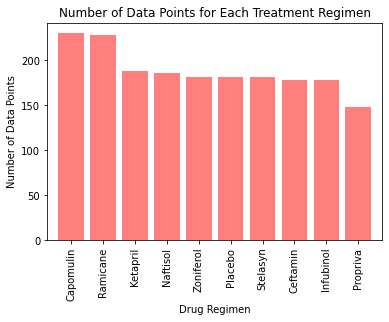

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_plot2=plt.bar(bar_clean.index, bar_clean.values, color='r', alpha=0.5, align="center")

# Create a bar chart based upon the above data
plt.xlim(-0.75, len(bar_clean)-0.25)


plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment Regimen")

plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=combine_df.groupby('Sex')

gendergroup_df=pd.DataFrame(gender_group['Sex'].count())

gendergroup_df


,Sex
Sex,
Female,935
Male,958


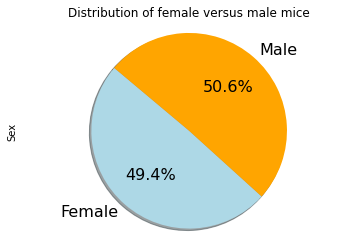

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gendergroup_df.plot(kind="pie", y='Sex',title="Distribution of female versus male mice",startangle=140,\
                       autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)


plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatment_df=clean_df.groupby("Mouse ID").max()["Timepoint"]

treatment_df=treatment_df.reset_index()
treatment_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge2_df=pd.merge(treatment_df, clean_df,on=["Mouse ID", "Timepoint"])

merge2_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_df=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
emptylist_df=[]

for x in drugs_df:
    drugs_vol=merge2_df.loc[merge2_df["Drug Regimen"]==x]
    tumor_vol_drugs=drugs_vol["Tumor Volume (mm3)"]
#     print (drugs_vol)
    emptylist_df.append(tumor_vol_drugs)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#drugs_vol_unstack =  drugs_vol.stack(level=0).unstack(level=0)
    
   
    quartiles = tumor_vol_drugs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{x} IQR data is:")
    print(f"The lower quartile of drugs_df is: {lowerq}")
    print(f"The upper quartile of drugs_df is: {upperq}")
    print(f"The interquartile range of drugs_df is: {iqr}")
    print(f"The the median of drugs_df is: {quartiles[0.5]} ")
    
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    micelist_df=["Mouse ID"]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers_count = (tumor_vol_drugs.loc[(drugs_vol['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (drugs_vol['Tumor Volume (mm3)'] <= lower_bound)]).count()
    #micelist_df.append(outliers_count)
    
    
    print(f'Lower Bound for {outliers_count}: {lower_bound}')
    print(f'Upper Bound for {outliers_count}: {upper_bound}')
    #print(f'Number of {tumor_vol_drugs} outliers: {outliers_count}')
        

Capomulin IQR data is:
The lower quartile of drugs_df is: 32.37735684
The upper quartile of drugs_df is: 40.1592203
The interquartile range of drugs_df is: 7.781863460000004
The the median of drugs_df is: 38.125164399999996 
Lower Bound for 0: 20.70456164999999
Upper Bound for 0: 51.83201549
Ramicane IQR data is:
The lower quartile of drugs_df is: 31.56046955
The upper quartile of drugs_df is: 40.65900627
The interquartile range of drugs_df is: 9.098536719999998
The the median of drugs_df is: 36.56165229 
Lower Bound for 0: 17.912664470000003
Upper Bound for 0: 54.30681135
Infubinol IQR data is:
The lower quartile of drugs_df is: 54.04860769
The upper quartile of drugs_df is: 65.52574285
The interquartile range of drugs_df is: 11.477135160000003
The the median of drugs_df is: 60.16518046 
Lower Bound for 1: 36.83290494999999
Upper Bound for 1: 82.74144559000001
Ceftamin IQR data is:
The lower quartile of drugs_df is: 48.72207785
The upper quartile of drugs_df is: 64.29983003
The interq

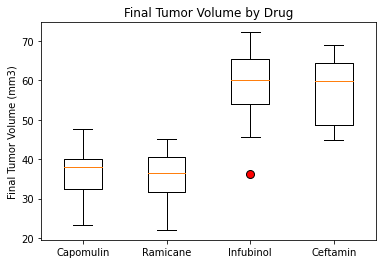

In [18]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#boxplot_list = []
#for drug in drugs_df:
    #boxplot_list.append(list(outliers_count[drug].dropna()))
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(emptylist_df, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

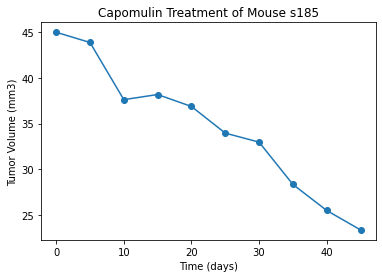

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_treated = combine_df.loc[combine_df['Mouse ID'] == 's185']

plt.plot(mouse_treated['Timepoint'], mouse_treated['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

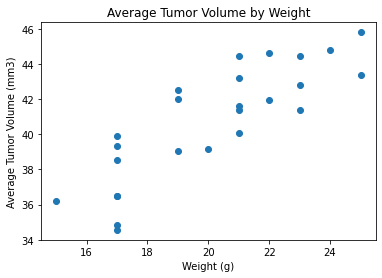

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin = combine_df.loc[combine_df['Drug Regimen'] == 'Capomulin']

#find average tumor volume
avg_vol_df = pd.DataFrame(mouse_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_data_df = pd.merge(mouse_capomulin, avg_vol_df, on='Mouse ID')
final_data_df = avg_data_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_data_df

x = final_data_df['Weight (g)']
y = final_data_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_capomulin = combine_df.loc[combine_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(mouse_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_data_df = pd.merge(mouse_capomulin, avg_vol_df, on='Mouse ID')
final_data_df = avg_data_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_data_df

#x_value = final_data_df['Weight (g)']
#y_value = final_data_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")


x_value = final_data_df['Weight (g)']
y_value = final_data_df['avg_tumor_vol']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


NameError: name 'linregress' is not defined